In [106]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 
import matplotlib.pyplot as plt
import visuals as vs


%matplotlib inline


data = pd.read_csv("census.csv")

display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [107]:
n_records = data.shape[0]

n_greater_50k = data[data["income"] == ">50K"].shape[0]

n_at_most_50k = data[data["income"] == "<=50K"].shape[0]

greater_percent = n_greater_50k/n_records*100.0

print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))
print("Feature valuse for each column:\n",data.columns)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%
Feature valuse for each column:
 Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


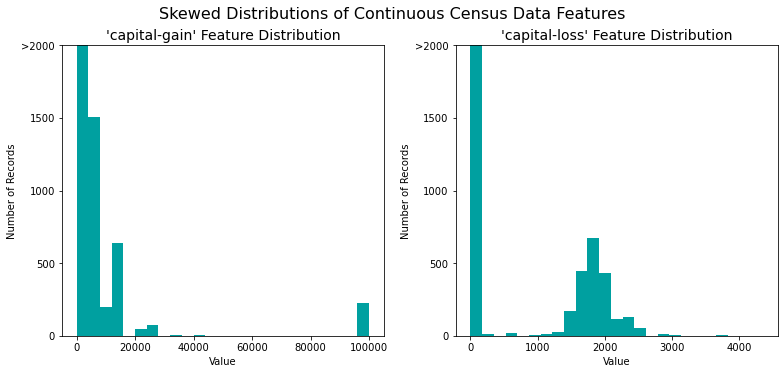

In [108]:

income_raw = data['income']
features_raw = data.drop('income', axis = 1)

vs.distribution(data)


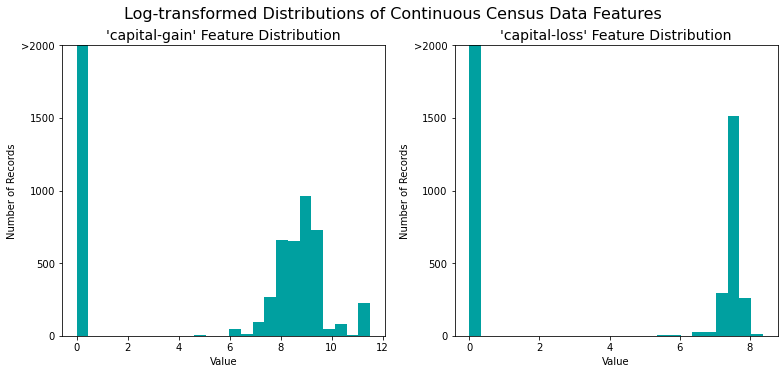

In [109]:
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

vs.distribution(features_log_transformed, transformed = True)

In [110]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [111]:
data2 =pd.get_dummies(features_log_minmax_transform)

income = income_raw.replace(["<=50K",">50K"],[0,1])

encoded = list(data2.columns)
print("{} total features ".format(len(encoded)))

print (encoded)

103 total features 
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical', 'occupati

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data2,income,test_size = 0.2, random_state = 0)

print("Training set has {} samples".format(X_train.shape[0]))
print("Testing set has {} samples".format(X_test.shape[0]))

Training set has 36177 samples
Testing set has 9045 samples


In [113]:
print('exercise2:')
TP = np.sum(income)
FP = income.count() - TP
TN = 0
FN = 0
accuracy = float(TP)/(TP+FP)
recall = float(TP)/(TP+FN)
precision = accuracy

beta=0.5
fscore = (1 + beta ** 2)*(precision * recall)/(beta ** 2 *precision + recall)
TPR = float(TP)/(TP + FN)
FPR = float(FP)/(TN + FP)
print("Accuracy score: {:.4f}, F-score: {:.4f}".format(accuracy, fscore))

exercise2:
Accuracy score: 0.2478, F-score: 0.2917


The function GaussianNB()'s fpr is [0.         0.50891813 1.        ] and ptr is[0.         0.92834467 1.        ]


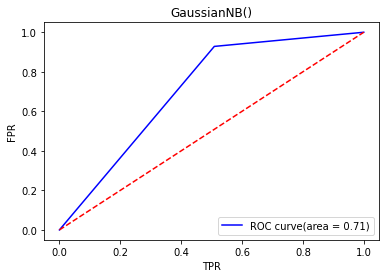

The function DecisionTreeClassifier()'s fpr is [0.         0.11593567 1.        ] and ptr is[0.        0.6122449 1.       ]


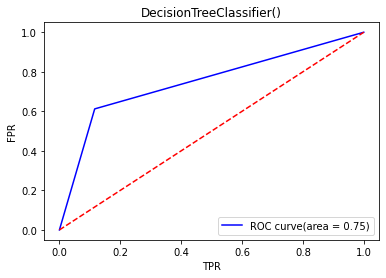

The function BaggingClassifier()'s fpr is [0.         0.08815789 1.        ] and ptr is[0.         0.61587302 1.        ]


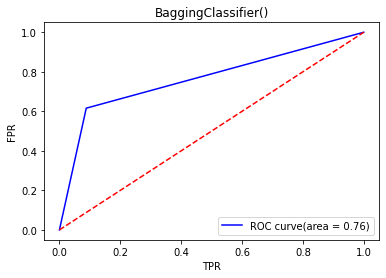

The function AdaBoostClassifier()'s fpr is [0.         0.06052632 1.        ] and ptr is[0.         0.60362812 1.        ]


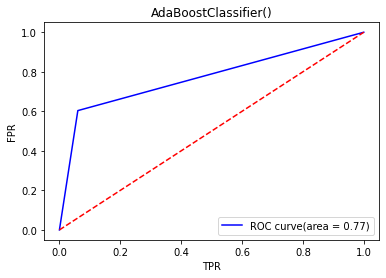

The function RandomForestClassifier()'s fpr is [0.        0.0880117 1.       ] and ptr is[0.        0.6276644 1.       ]


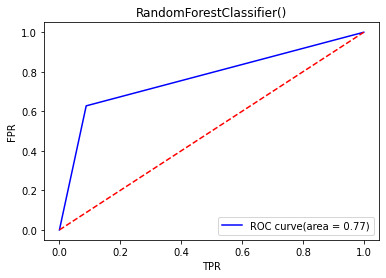

The function KNeighborsClassifier()'s fpr is [0.         0.10146199 1.        ] and ptr is[0.         0.59092971 1.        ]


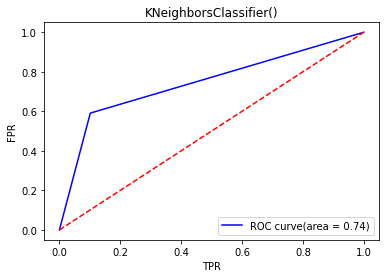

The function SVC()'s fpr is [0.         0.07602339 1.        ] and ptr is[0.         0.58911565 1.        ]


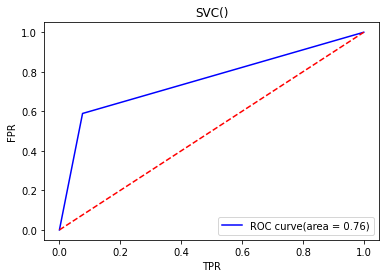

The function LogisticRegression()'s fpr is [0.         0.07865497 1.        ] and ptr is[0.         0.59637188 1.        ]


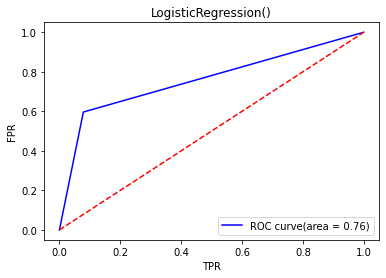

In [114]:
from sklearn.metrics import fbeta_score,accuracy_score,confusion_matrix,roc_curve,auc
def train(learner, X_train, Y_train, X_test, Y_test): 

    results = {}

    #fit/train
    learner.fit(X_train,Y_train)

    Y_pred_test = learner.predict(X_test)
    Y_pred_train = learner.predict(X_train)

    fpr, tpr, threshold = roc_curve(Y_test,Y_pred_test)
    print('The function {}\'s fpr is {} and ptr is{}'.format(learner,fpr,tpr))
    roc_auc = auc(fpr,tpr)
    plt.figure()
    plt.title(learner)
    plt.plot(fpr,tpr,'b',label = 'ROC curve(area = %.2f)'%roc_auc)
    plt.legend(loc = "lower right")
    plt.plot([0,1],[0,1],'r--',label = 'random')
    plt.xlabel('TPR')
    plt.ylabel('FPR')
    plt.show()



from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
learner = [GaussianNB(),DecisionTreeClassifier(),BaggingClassifier(),AdaBoostClassifier(),RandomForestClassifier(),KNeighborsClassifier(),SVC(),LogisticRegression()]
for i in learner:
    train(i,X_train,Y_train,X_test,Y_test)

In [115]:
def printfeature_score(learner,X_test,Y_test,X_train,Y_train):
    #print the top 5 important features
    learner.fit(X_train,Y_train)
    score = learner.score(X_test,Y_test)
    features = list(X_test.columns)
    importances = learner.feature_importances_
    indices = np.argsort(importances)[::-1]
    # print top 5 important features
    num_features = 5
    plt.figure()
    plt.title(learner)
    plt.bar(range(num_features), importances[indices[0:num_features]], color="g", align="center")
    plt.xticks(range(num_features), [features[i] for i in indices], rotation='45')
    plt.xlim([-1, num_features])
    plt.show()

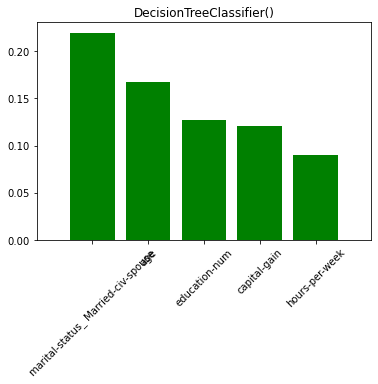

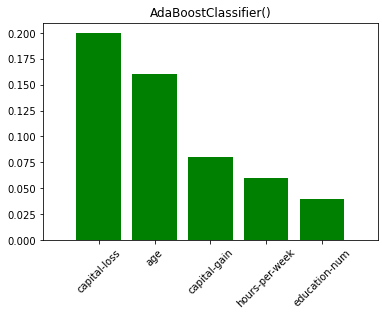

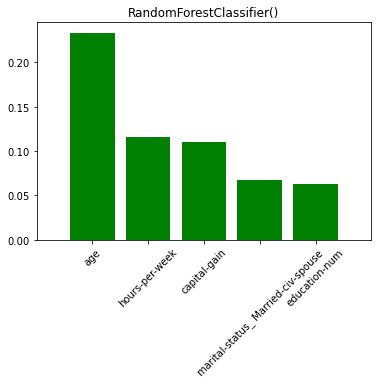

In [116]:
learner = [DecisionTreeClassifier(),AdaBoostClassifier(),RandomForestClassifier()]
for i in learner:
    printfeature_score(i,X_test,Y_test,X_train,Y_train)